In [11]:
import numpy as n
import pandas as d
import matplotlib.pyplot as lt
import seaborn as sns

In [12]:
df = sns.load_dataset('tips')

In [13]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [15]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### using figure level function   - also called as facet plot

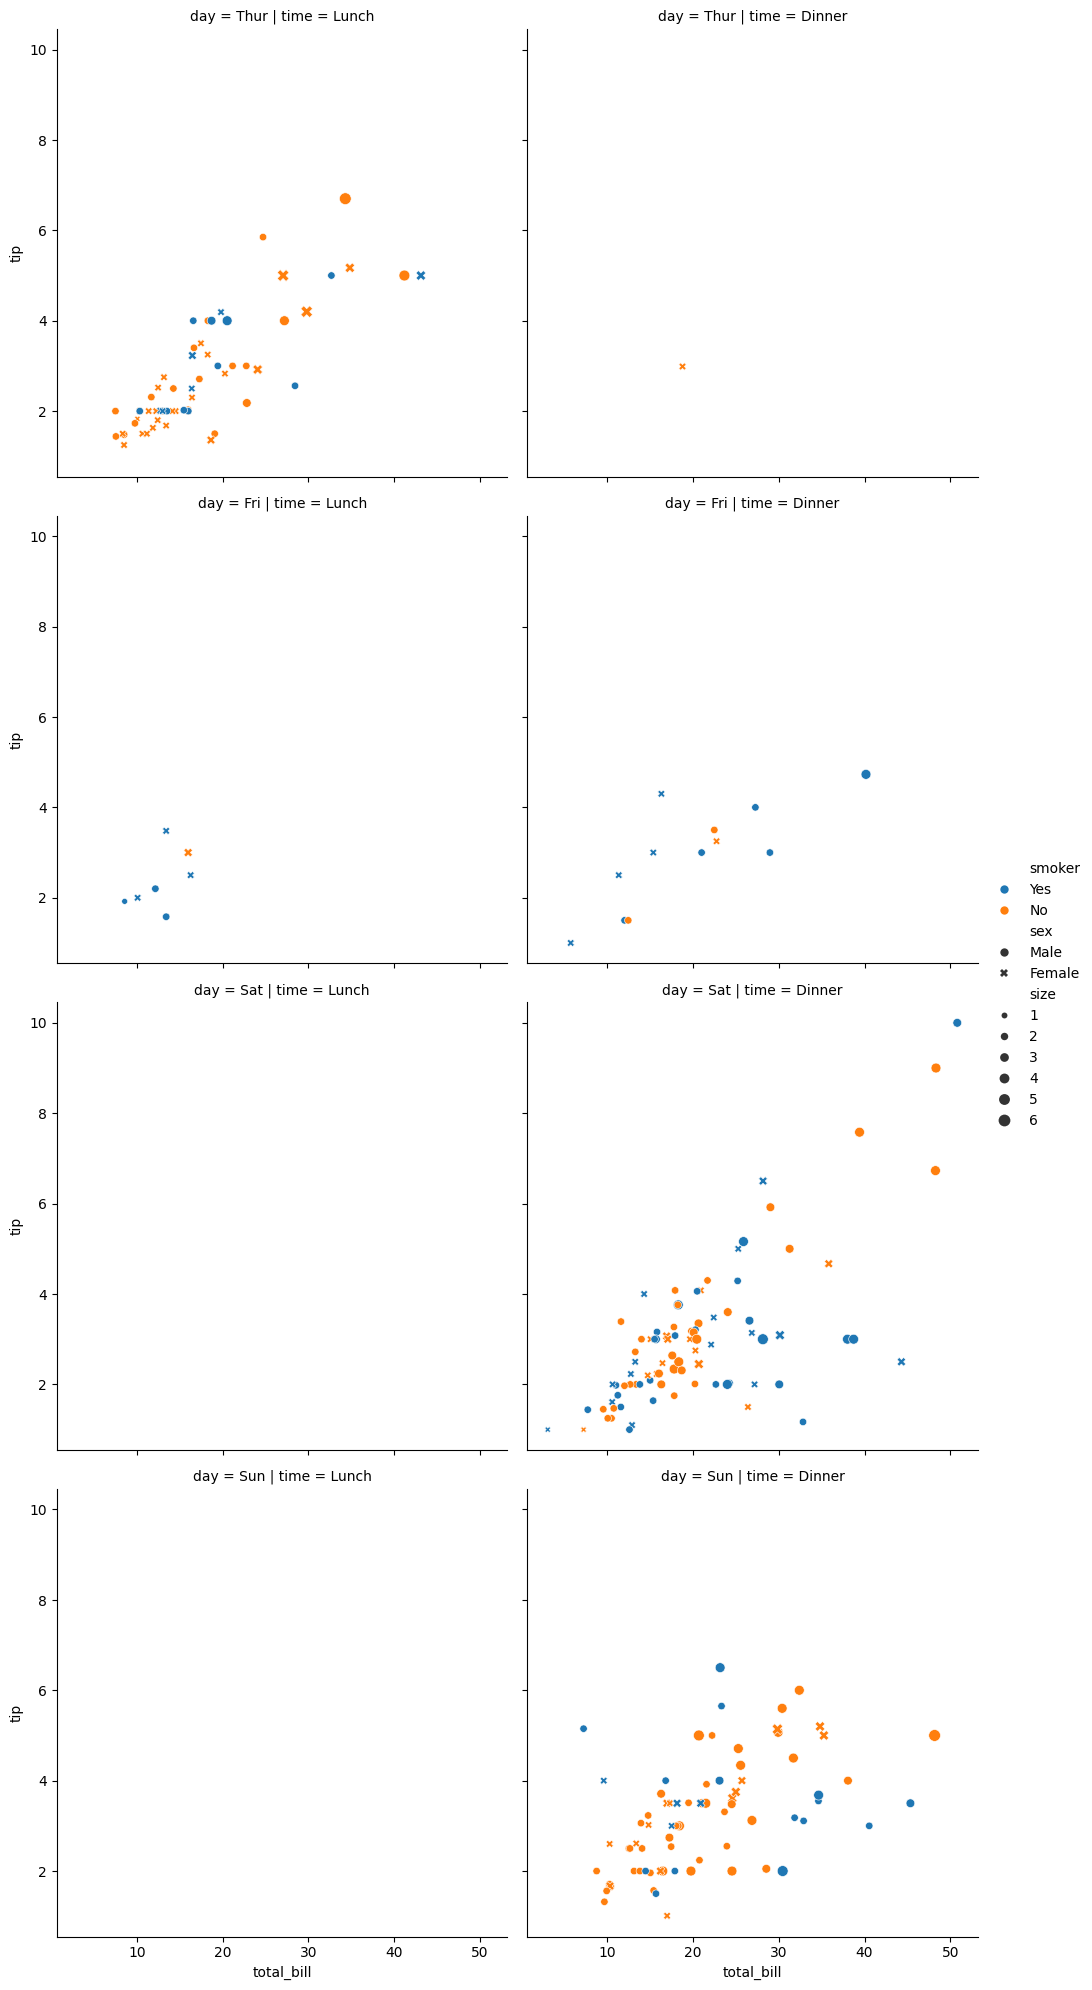

In [64]:
sns.relplot(data=df, x = 'total_bill', y='tip', hue = 'smoker', col='time', row='day',style='sex', size = 'size')
lt.show()

### using axis level function

<Axes: xlabel='total_bill', ylabel='tip'>

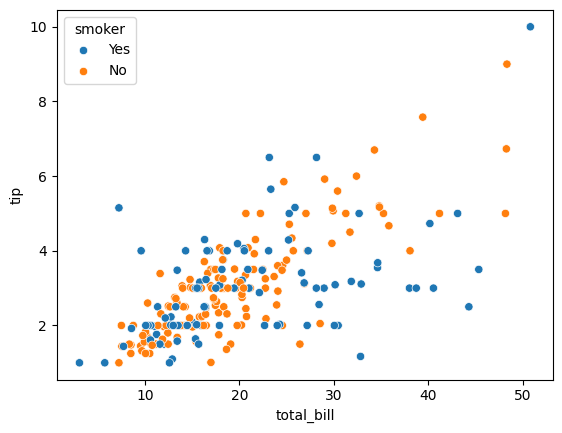

In [17]:
sns.scatterplot(data=df, x = 'total_bill', y='tip', hue = 'smoker')

In [18]:
import plotly.express as x
df2 = x.data.gapminder()

In [19]:
df2.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


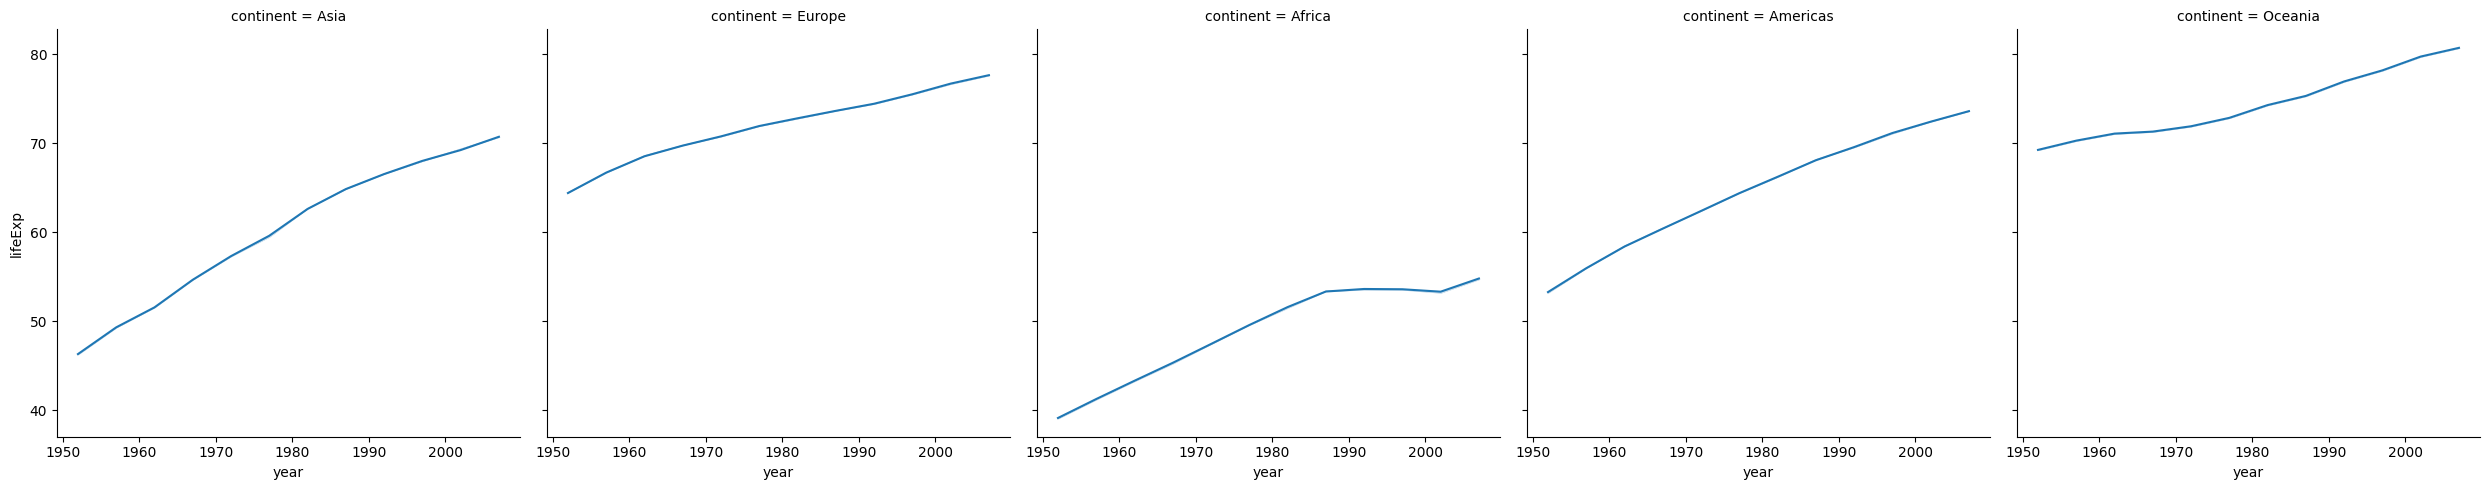

In [20]:

sns.relplot(data= df2, kind='line', y = 'lifeExp', x = 'year', col = 'continent', errorbar=('ci', False))

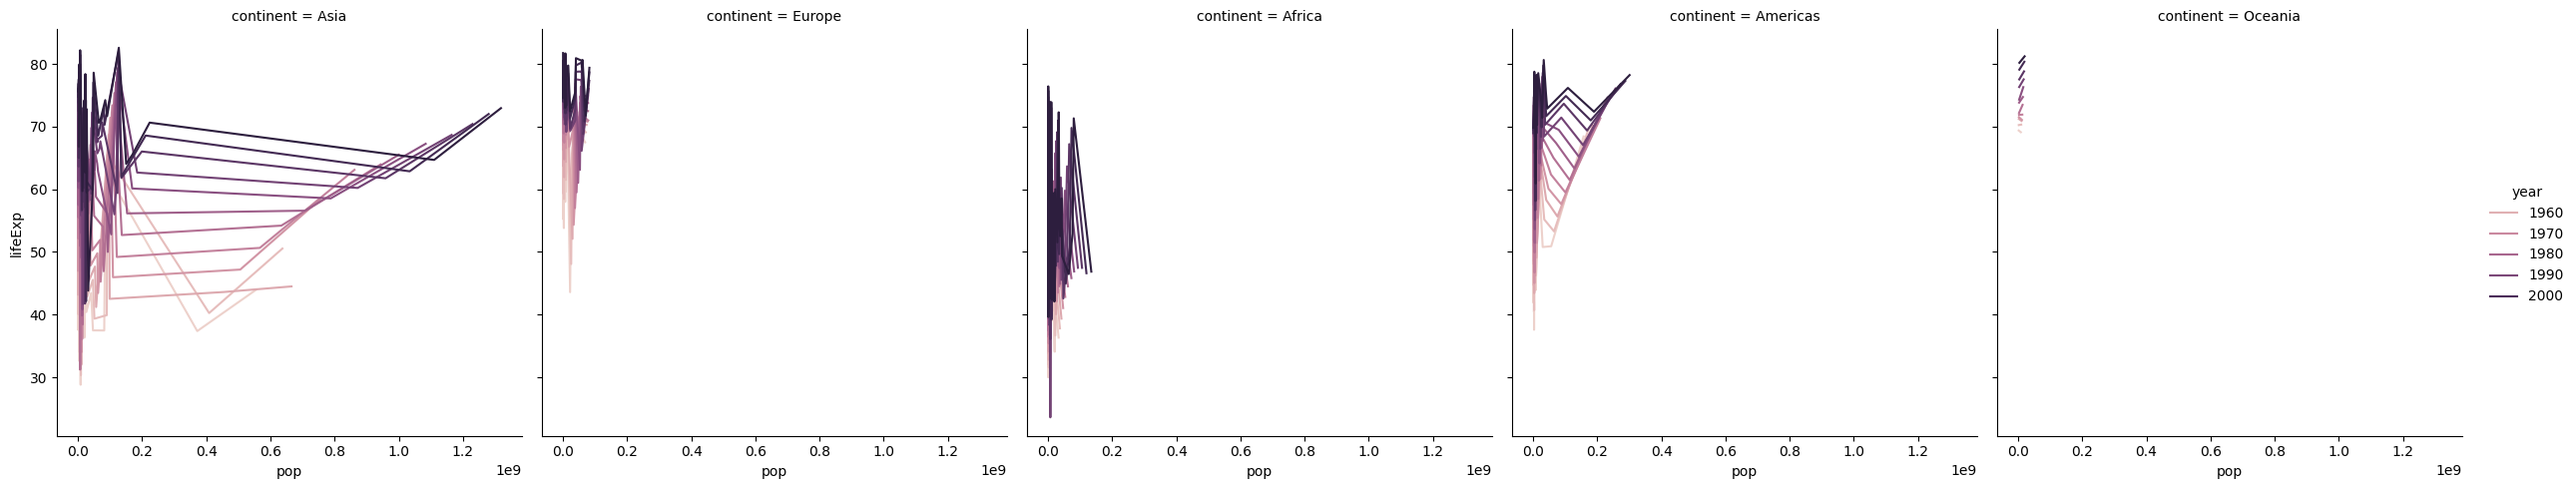

In [21]:

sns.relplot(data= df2, kind='line', y = 'lifeExp', x= 'pop',col = 'continent', hue = 'year')

In [22]:
indiadf =df2[ df2['country'].isin(['India','China', 'Afghanistan'])]

In [23]:
indiadf.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap',
       'iso_alpha', 'iso_num'],
      dtype='object')

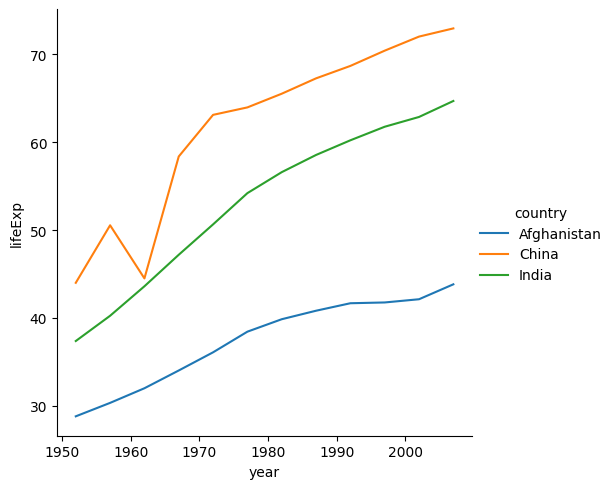

In [24]:
sns.relplot(data=indiadf, kind='line', y='lifeExp', x='year', hue='country', errorbar= ('ci', False))

In [32]:
ivot = indiadf.pivot(index = 'year', columns = 'country', values= 'lifeExp')

In [33]:
ivot

country,Afghanistan,China,India
year,,,
1952,28.801,44.00000,37.373
1957,30.332,50.54896,40.249
1962,31.997,44.50136,43.605
1967,34.020,58.38112,47.193
1972,36.088,63.11888,50.651
1977,38.438,63.96736,54.208
1982,39.854,65.52500,56.596
1987,40.822,67.27400,58.553
1992,41.674,68.69000,60.223


<Axes: xlabel='country', ylabel='year'>

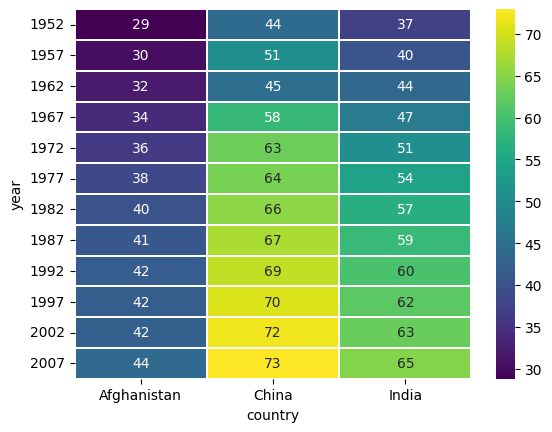

In [36]:
sns.heatmap(ivot, annot=True, cmap='viridis', linewidths=0.2)

In [37]:
newdf= df[['total_bill','tip','size']]

In [38]:
newdf.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<Axes: >

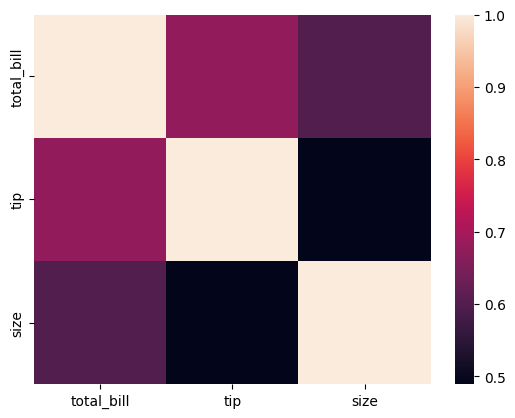

In [39]:
sns.heatmap(newdf.corr())

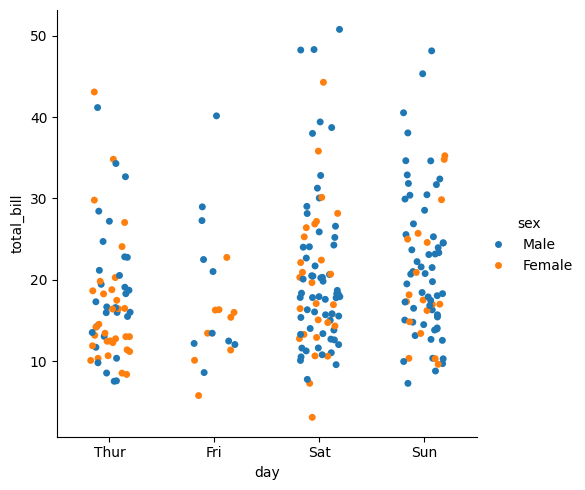

In [41]:
# jitter
sns.catplot(data=df, x='day',y='total_bill',kind='strip',jitter=0.2,hue='sex')

In [45]:
help(sns.boxplot)

Help on function boxplot in module seaborn.categorical:

boxplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, fill=True, dodge='auto', width=0.8, gap=0, whis=1.5, linecolor='auto', linewidth=None, fliersize=None, hue_norm=None, native_scale=False, log_scale=None, formatter=None, legend='auto', ax=None, **kwargs)
    Draw a box plot to show distributions with respect to categories.

    A box plot (or box-and-whisker plot) shows the distribution of quantitative
    data in a way that facilitates comparisons between variables or across
    levels of a categorical variable. The box shows the quartiles of the
    dataset while the whiskers extend to show the rest of the distribution,
    except for points that are determined to be "outliers" using a method
    that is a function of the inter-quartile range.

    See the :ref:`tutorial <categorical_tutorial>` for more information.

    .. note::
        By defaul

<Axes: xlabel='day', ylabel='total_bill'>

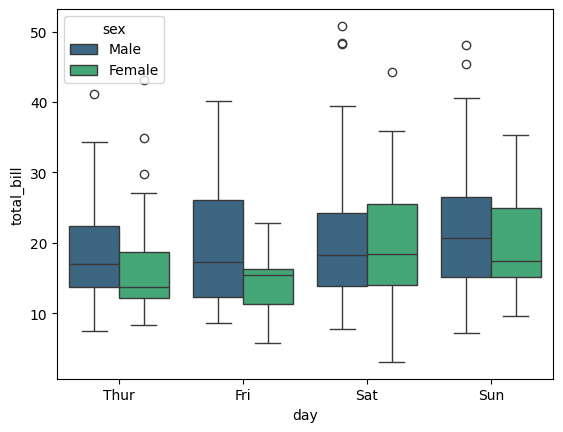

In [55]:

sns.boxplot(data=df,x='day',y='total_bill',palette='viridis', hue='sex')

In [ ]:
#hw residual plot  
# confidence interval

c:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the swarmplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


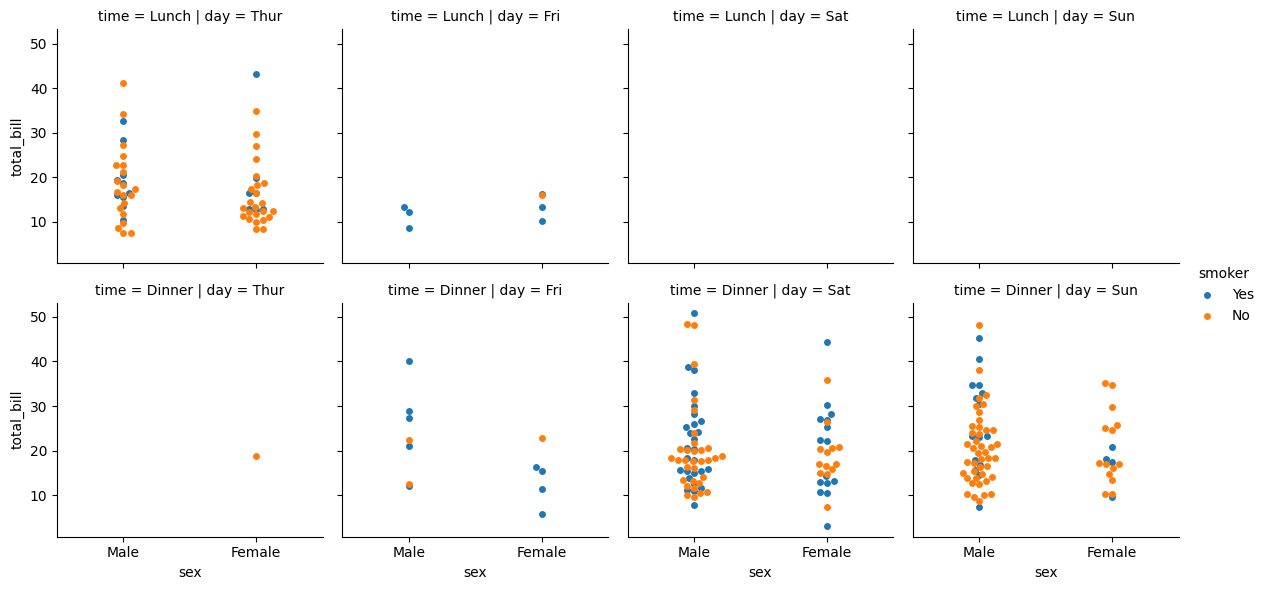

In [ ]:
g = sns.FacetGrid(data=df,col='day',row='time',hue='smoker')
g.map(sns.swarmplot,'sex','total_bill')
g.add_legend()